In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [156]:
sns.set(
        font_scale=2,
       style      ="whitegrid",
       rc         ={'figure.figsize':(20,7)}
)

In [92]:
ads_data=pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-a-zakorko/shared/homeworks/python_ds_miniprojects/6/ads_data.csv')
ads_clients_data=pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-a-zakorko/shared/homeworks/python_ds_miniprojects/6/ads_clients_data.csv')

In [95]:
ads_data

,date,time,event,platform,ad_id,client_union_id,campaign_union_id,ad_cost_type,ad_cost,has_video,target_audience_count,count1,datetime
0,2019-04-01,2019-04-01 00:00:48,view,android,45061,34734,45061,CPM,200.6,0,1955269,1,2019-04-01 00:00:48-01:00
1,2019-04-01,2019-04-01 00:00:48,view,web,121288,121288,121288,CPM,187.4,0,232011,1,2019-04-01 00:00:48-01:00
2,2019-04-01,2019-04-01 00:01:03,view,android,102737,102535,102564,CPC,60.7,0,4410,1,2019-04-01 00:01:03-01:00
3,2019-04-01,2019-04-01 00:01:03,view,android,107564,106914,107564,CPM,217.3,0,62711,1,2019-04-01 00:01:03-01:00
4,2019-04-01,2019-04-01 00:01:09,view,android,4922,37,4400,CPC,60.1,0,1183501,1,2019-04-01 00:01:09-01:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,2019-04-05,2019-04-05 20:59:52,view,web,112583,111818,112260,CPM,210.1,0,22392,1,2019-04-05 20:59:52-05:00
999996,2019-04-05,2019-04-05 20:59:52,view,android,112583,111818,112260,CPM,210.1,0,22392,1,2019-04-05 20:59:52-05:00
999997,2019-04-05,2019-04-05 20:59:52,click,web,112583,111818,112260,CPM,210.1,0,22392,1,2019-04-05 20:59:52-05:00
999998,2019-04-05,2019-04-05 20:59:52,view,web,113350,113036,113251,CPM,183.3,0,571929,1,2019-04-05 20:59:52-05:00


In [34]:
event_counts = ads_data.pivot_table(index='ad_id', columns='event', aggfunc='size', fill_value=0)
average_events = event_counts.mean().round().astype(int) # 2 задание
average_events

event
click    113
view     923
dtype: int64

/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


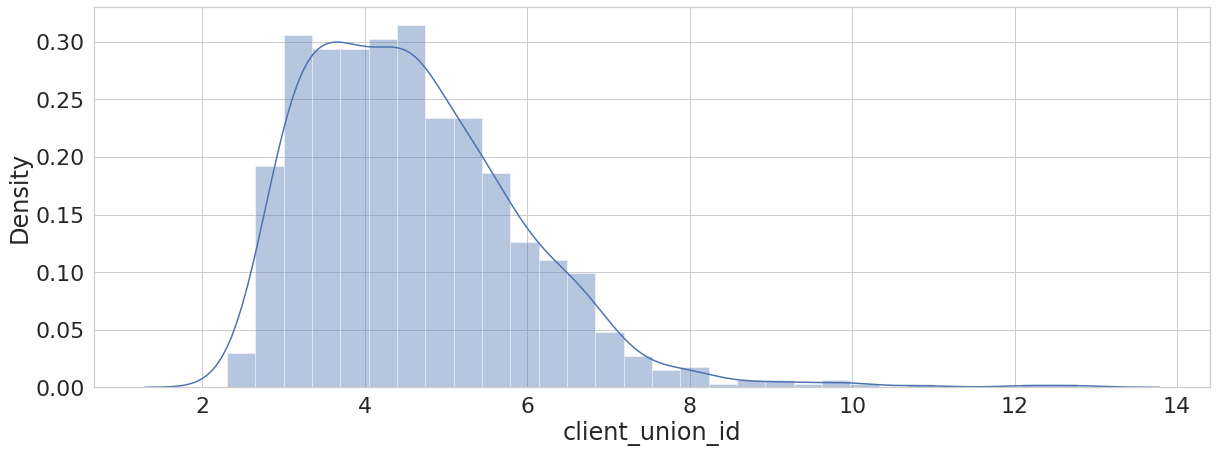

In [56]:
ads_view=ads_data.groupby(['ad_id','event'],as_index=False).agg({'client_union_id':'count'}).query("event=='view'")
ads_view=np.log(ads_view.client_union_id)#3 задание
sns.distplot(ads_view)

In [98]:
ads_1=ads_data.query("event=='view'") #4 задание
ads_1['count1']=1
ads_1 = ads_1.groupby(['ad_id','date'],as_index=False).agg({'count1':'count'})
ads_1 = ads_1.groupby('date',as_index=False).agg({'count1':'mean'})
ads_1.count1.rolling(2).mean()

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


0           NaN
1    146.134626
2    150.869880
3    419.927249
4    797.505699
5    598.116202
Name: count1, dtype: float64

In [99]:
# Отфильтруем только события с показами !4 задание!
views_data = ads_data[ads_data['event'] == 'view']

# Группируем данные по дате и ad_id, считаем количество показов
daily_views = views_data.groupby(['date', 'ad_id']).size().reset_index(name='views_count')

# Считаем среднее количество показов на объявление по дням
daily_average_views = daily_views.groupby('date')['views_count'].mean()

# Рассчитываем скользящее среднее с окном в 2 элемента
rolling_average = daily_average_views.rolling(window=2).mean().round()

# Получаем значение за 6 апреля 2019 года
april_6_rolling_average = rolling_average['2019-04-06']

april_6_rolling_average


598.0

In [103]:
ads_1=ads_data.query("event=='view'") #5 задание
ads_1['count1']=1
ads_1 = ads_1.groupby(['ad_id','date'],as_index=False).agg({'count1':'count'})
ads_1 = ads_1.groupby('date',as_index=False).agg({'count1':'mean'})
ads_1 = (ads_1.count1 - ads_1.count1.rolling(2).mean()).abs()
ads_1

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


0           NaN
1      8.347644
2     13.082898
3    255.974471
4    121.603979
5    320.993475
Name: count1, dtype: float64

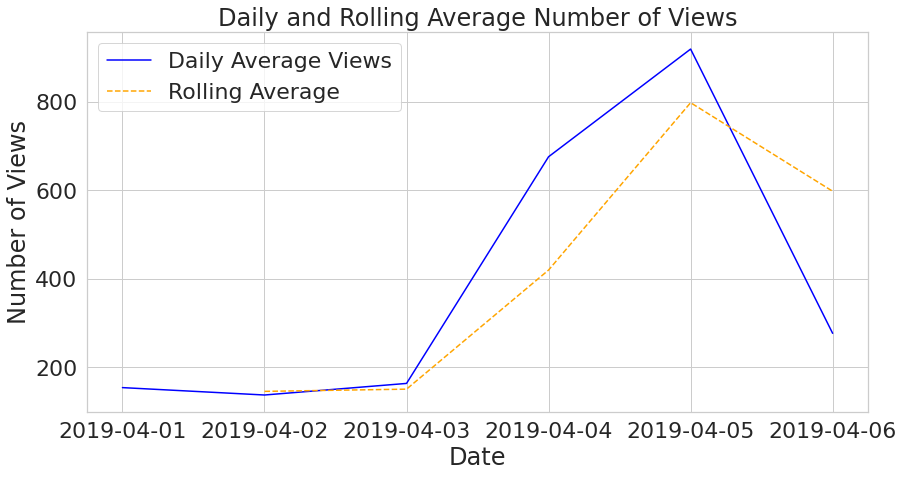

'2019-04-06'

In [104]:
# Построим график среднего количества показов и скользящего среднего #5 задание
plt.figure(figsize=(14, 7))
daily_average_views.plot(label='Daily Average Views', color='blue')
rolling_average.plot(label='Rolling Average', color='orange', linestyle='--')
plt.legend()
plt.title('Daily and Rolling Average Number of Views')
plt.xlabel('Date')
plt.ylabel('Number of Views')
plt.grid(True)
plt.show()

# Найдем день с наибольшей разницей между средним и скользящим средним
# Сначала убедимся, что исключим NaN значения скользящего среднего
comparison_df = pd.DataFrame({
    'daily_average_views': daily_average_views,
    'rolling_average': rolling_average
}).dropna()

# Рассчитаем разницу между количествами
comparison_df['difference'] = (comparison_df['daily_average_views'] - comparison_df['rolling_average']).abs()

# Найдем индекс (дату) с наибольшей разницей
max_difference_date = comparison_df['difference'].idxmax()

max_difference_date


In [110]:
# Конвертация дат в формат datetime #6 задание
ads_data['date'] = pd.to_datetime(ads_data['date'])
ads_clients_data['create_date'] = pd.to_datetime(ads_clients_data['create_date'])

# Объединение данных о рекламе и рекламных клиентах по client_union_id
merged_data = pd.merge(ads_data, ads_clients_data, on='client_union_id')

# Вычисляем разницу в днях между датой создания клиента и датой запуска первой рекламы
merged_data['days_difference'] = (merged_data['date_x'] - merged_data['create_date']).dt.days

# Группируем данные по client_union_id, чтобы найти первую дату показа рекламы для каждого клиента
first_ad_date = merged_data[merged_data['event'] == 'view'].groupby('client_union_id')['date_x'].min().reset_index()

# Объединяем данные о первом показе с данными о создании клиента
first_ad_date = pd.merge(first_ad_date, ads_clients_data, on='client_union_id')

# Вычисляем разницу в днях для каждого клиента
first_ad_date['days_difference'] = (first_ad_date['date_x'] - first_ad_date['create_date']).dt.days

# Находим среднее значение разницы в днях
average_days = first_ad_date['days_difference'].mean()
average_days

124.65625

In [135]:
# Отфильтровываем тех клиентов, которые запустили рекламу в течение 365 дней
conversion_data = merged_data[merged_data['days_difference'] <= 365] #7 задание

# Группируем данные по client_union_id, чтобы найти клиентов, запустивших рекламу
clients_with_ads = conversion_data.groupby('client_union_id').size().reset_index(name='ads_count')

# Находим общее число клиентов, создавших кабинет
total_clients = ads_clients_data['client_union_id'].nunique()

# Находим число клиентов, запустивших рекламу
clients_started_ads = clients_with_ads['client_union_id'].nunique()

# Вычисляем конверсию
conversion_rate = (clients_started_ads / total_clients) * 100

# Округляем до двух знаков после запятой
conversion_rate = round(conversion_rate, 2)
conversion_rate

0.69

In [154]:
merged_data['days_difference_1'] = (merged_data['date_x'] - merged_data['create_date']) #8 задание
# Определение бинов для категорий
bins = [pd.Timedelta(days=0), pd.Timedelta(days=30), pd.Timedelta(days=90), pd.Timedelta(days=180), pd.Timedelta(days=365)]

# Определение названий для категорий
labels = ['0-30', '30-90', '90-180', '180-365']

# Создание новой категориальной колонки в DataFrame
merged_data['create_categorical'] = pd.cut(merged_data['days_difference_1'], bins=bins, labels=labels, right=False)
a=merged_data.query("create_categorical=='0-30'")
b=merged_data.groupby('create_categorical',as_index=False).agg({'ad_id':'nunique'})

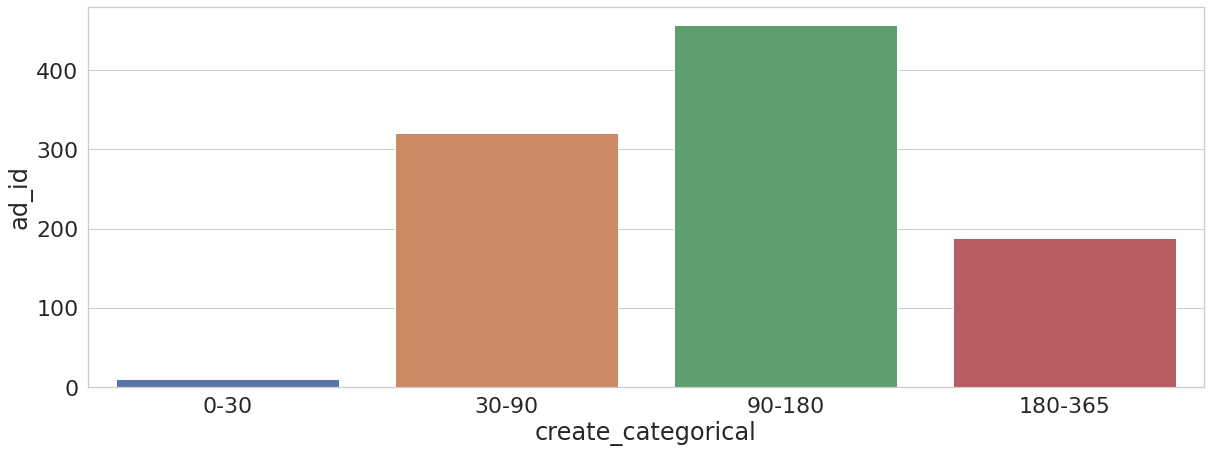

In [158]:
sns.barplot(x=b.create_categorical, y=b.ad_id)
